IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

ZHONG YUCHEN

## Préparation

Décompresser l'archive, elle crée le répertoire "tp9" qui contient :
- un fichier ipython à ouvrir (ce fichier-ci)
- un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance
- un sous-répertoire "IADS2018" (qui contient 2 fichiers python) dont l'utilisation est détaillée un peu plus loin dans ce fichier ipython.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Construction d'un package de fonctions

Dans un premier temps, afin de pouvoir utiliser toutes les fonctions écrites dans le TP précédent (fonctions pour les K-moyennes), vous allez réaliser un package de fonctions qui s'appelle "<tt>IADS2018</tt>".

Le package <tt>IADS2018</tt> est composé ainsi :
- c'est un répertoire dont le nom est <tt>IADS2018</tt>
- ce répertoire contient le fichier <tt>\__init\__.py</tt> qui, dans notre cas, est un fichier vide (mais il est important que ce fichier existe !)
- ce répertoire contient le fichier <<tt>kmoyennes.py</tt> qui est le fichier dans lequel vous devez mettre toutes les fonctions écrites lors du TP précédent sur les K-moyennes.

<font size="+1" color="RED">**[Q]**</font> En utilisant votre éditeur de texte préféré (emacs, gedit, vim,...) ouvrir le fichier <tt>kmoyennes.py</tt> qui se trouve dans le sous-répertoire <tt>IADS2018</tt> et compléter-le en reprenant les fonctions que vous avez écrites dans la séance précédente.

Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en utilisant une commande d'importation:

In [3]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
import IADS2018 
import IADS2018.kmoyennes as km

#### Vérification que tout fonctionne bien

Si la recopie de toutes vos fonctions s'est bien déroulée, une fois l'importation faite il est possible de tester les instructions des boites suivantes:

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


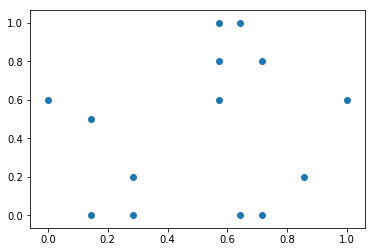

In [4]:
# Affichage des points après normalisation:

DataFnorm = km.normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

iteration 0 Inertie :  0.7199251700680271 Difference: inf


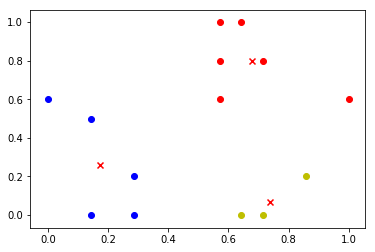

In [5]:
les_centres, l_affectation = km.kmoyennes(3, DataFnorm, 0.05, 100)

km.affiche_resultat(DataFnorm,les_centres,l_affectation)

## Travail à réaliser

On peut reprendre les fonctions écrites dans les tp sur l'apprentissage supervisé pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

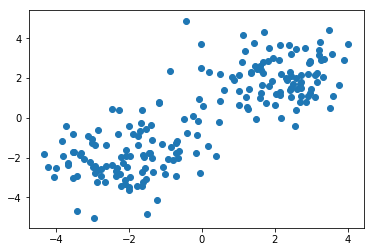

In [6]:
def createGaussianDataset(group1_center,group2_center,sigma,nb_points):
        group1 = np.random.multivariate_normal(group1_center,sigma,nb_points)
        group2 = np.random.multivariate_normal(group2_center,sigma,nb_points)
        
        return np.concatenate((group1, group2))

# Utilisation de cette fonction :
the_set = createGaussianDataset(np.array([2,2]),np.array([-2,-2]),np.array([[1.1,0],[0,1.1]]),100)

# Affichage des points obtenus
data_random = pd.DataFrame(the_set, columns = ['X', 'Y'])
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

iteration 0 Inertie :  8.241141573110282 Difference: inf
iteration 1 Inertie :  5.921948568378848 Difference: 2.3191930047314333


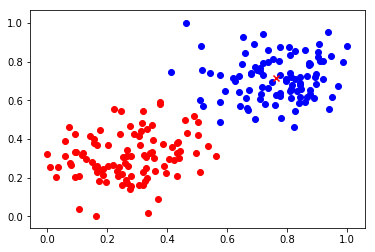

In [7]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration 0 Inertie :  5.169511556136651 Difference: inf
iteration 1 Inertie :  5.090366214289394 Difference: 0.07914534184725763
iteration 2 Inertie :  5.036493776884553 Difference: 0.05387243740484049


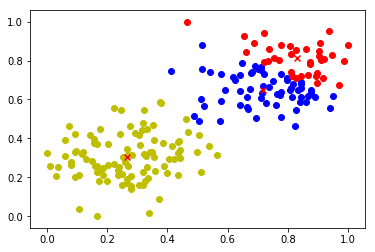

In [8]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration 0 Inertie :  3.920214933596635 Difference: inf
iteration 1 Inertie :  3.4751166644652685 Difference: 0.44509826913136674
iteration 2 Inertie :  3.1269572214422343 Difference: 0.34815944302303414
iteration 3 Inertie :  2.988676817062751 Difference: 0.1382804043794832


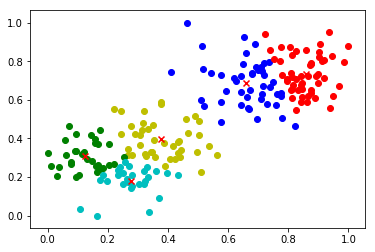

In [9]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration 0 Inertie :  3.66301116405694 Difference: inf
iteration 1 Inertie :  3.292686406245119 Difference: 0.37032475781182095
iteration 2 Inertie :  3.167511544094304 Difference: 0.12517486215081508
iteration 3 Inertie :  3.013198313749489 Difference: 0.15431323034481492
iteration 4 Inertie :  2.8987920556011706 Difference: 0.11440625814831851


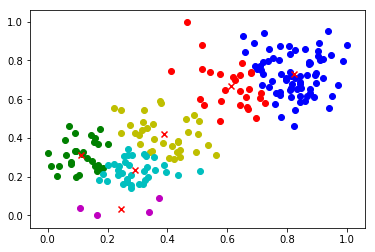

In [10]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [16]:
def dist_intracluster(ensemble):
    max_distance=-999
    for i in range(0,len(ensemble)):
        for j in range(0,len(ensemble)):
            current=km.dist_vect(ensemble.iloc[i],ensemble.iloc[j])
            if (max_distance < current):
                max_distance=current
    return max_distance

In [22]:
l_affectation


{0: [0, 1, 2, 3, 4], 1: [5, 6, 7, 9, 11, 13], 2: [8, 10, 12]}

In [17]:
# Avec les données jouet:
for k in range(0,len(l_affectation)):
    DF = DataFnorm.iloc[l_affectation[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.36914285714285705	distance = 0.6645544771207432
pour 1 : inertie = 0.30030612244897964	distance = 0.5862367008195198
pour 2 : inertie = 0.05047619047619047	distance = 0.2931183504097598


In [18]:
# Avec les données générées aléatoirement:
for k in range(0,len(l_affectation)):
    DF = DataRandom.iloc[l_affectationRand2[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 1.266323539218283	distance = 0.5006977557658623
pour 1 : inertie = 0.5151548810498651	distance = 0.5485336994560647
pour 2 : inertie = 0.5019577885768193	distance = 0.41683666799993


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [25]:
def global_intraclusters(DF,dict_affect):
    list_dist = []
    for k in dict_affect.keys():
        tmp_dataF = DF.iloc[dict_affect[k]]
        list_dist.append(dist_intracluster(tmp_dataF))
    return max(list_dist)

In [26]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.6645544771207432
Données aléatoire: 0.5485336994560647
Avec l'inertie :
Données jouet: 0.7199251700680271
Données aléatoire: 2.8538027440516585


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [27]:
def sep_clusters (ens_centres):
    listDist = []
    for i in range(len(ens_centres)):
        for j in range(len(ens_centres)):
            if i != j:
                listDist.append(km.dist_vect(ens_centres.iloc[i], ens_centres.iloc[j]))
            
    return min(listDist)

In [28]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.5987394165151388


In [29]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.19566060905451926


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [33]:
def evaluation(nom_index, DF, centroides, l_affect):
    if(nom_index == "Dunn"):
        return global_intraclusters(DF,l_affect)/sep_clusters(centroides)
    if (nom_index == "XB"):
        return km.inertie_globale(DF,l_affect)/sep_clusters(centroides)

In [34]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",DataFnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",DataFnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	1.109922712268836
	XB:	1.202401495893204
Pour les données aléatoires (6 clusters):
	Dunn:	2.8034958191468173
	XB:	14.585474091294836
Pour les données aléatoires (5 clusters):
	Dunn:	3.2068681067341767
	XB:	14.671464495723125


## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [40]:
def optimisation(K,DF):
    les_centres, l_affectation = km.kmoyennes(K, DF, 0.1, 200)
    indexDunn=evaluation("Dunn",DF,les_centres,l_affectation)
    indexXB=evaluation("XB",DF,les_centres,l_affectation)
    return [indexDunn,indexXB]

In [41]:
optimisation (2,DataFnorm)

iteration 0 Inertie :  2.144030612244898 Difference: inf
iteration 1 Inertie :  2.0417052154195012 Difference: 0.10232539682539699
iteration 2 Inertie :  1.6188338192419824 Difference: 0.4228713961775188
iteration 3 Inertie :  1.4279421768707483 Difference: 0.19089164237123413


[1.4882100686918716, 2.125077925128837]

iteration 0 Inertie :  1.4718950437317784 Difference: inf
iteration 0 Inertie :  0.9323935860058308 Difference: inf
iteration 1 Inertie :  0.7812585034013606 Difference: 0.15113508260447017
iteration 0 Inertie :  0.5479455782312924 Difference: inf
iteration 0 Inertie :  0.4190748299319728 Difference: inf
iteration 1 Inertie :  0.23427891156462588 Difference: 0.18479591836734693
iteration 0 Inertie :  0.45818027210884354 Difference: inf
iteration 1 Inertie :  0.28387755102040824 Difference: 0.1743027210884353
iteration 0 Inertie :  0.18306122448979595 Difference: inf
iteration 0 Inertie :  0.15299319727891159 Difference: inf
iteration 0 Inertie :  0.08323129251700681 Difference: inf
iteration 0 Inertie :  0.053027210884353755 Difference: inf


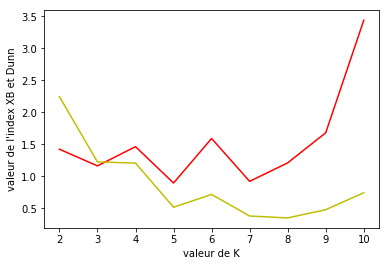

In [44]:
index_Dunn = []
index_XB = []
for k in range(2, 11):
    dunn, xb = optimisation(k, DataFnorm)
    index_Dunn.append(dunn)
    index_XB.append(xb)
plt.plot([i for i in range(2, 11)], index_Dunn, color='r')
plt.plot([i for i in range(2, 11)], index_XB, color='y')
plt.xlabel("valeur de K")
plt.ylabel("valeur de l'index XB et Dunn")
plt.show()

# Valeur de K vaut 7 est mieux pour Dunn et 8 pour XB

iteration 0 Inertie :  1.8025668934240362 Difference: inf
iteration 1 Inertie :  1.6934098639455784 Difference: 0.10915702947845785
iteration 2 Inertie :  1.4718950437317784 Difference: 0.22151482021379998
iteration 0 Inertie :  1.0542157434402333 Difference: inf
iteration 0 Inertie :  1.036584062196307 Difference: inf
iteration 1 Inertie :  0.740170068027211 Difference: 0.296413994169096
iteration 2 Inertie :  0.6329251700680273 Difference: 0.10724489795918368
iteration 0 Inertie :  0.7223061224489795 Difference: inf
iteration 1 Inertie :  0.5047210884353741 Difference: 0.2175850340136054
iteration 0 Inertie :  0.45011904761904764 Difference: inf
iteration 1 Inertie :  0.1628231292517007 Difference: 0.2872959183673469
iteration 0 Inertie :  0.2009183673469388 Difference: inf
iteration 0 Inertie :  0.16221088435374154 Difference: inf
iteration 0 Inertie :  0.08309523809523814 Difference: inf
iteration 0 Inertie :  0.08068027210884354 Difference: inf


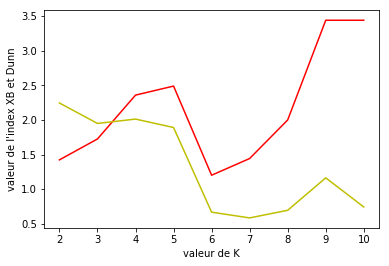

In [46]:
index_Dunn = []
index_XB = []
for k in range(2, 11):
    dunn, xb = optimisation(k, DataFnorm)
    index_Dunn.append(dunn)
    index_XB.append(xb)
plt.plot([i for i in range(2, 11)], index_Dunn, color='r')
plt.plot([i for i in range(2, 11)], index_XB, color='y')
plt.xlabel("valeur de K")
plt.ylabel("valeur de l'index XB et Dunn")
plt.show()

# Valeur de K vaut 6 est mieux pour Dunn et 7 pour XB

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


In [51]:
data_Paris = pd.read_csv("data/base-Paris.csv",delimiter = ";")
data_T_Paris = data_Paris.drop([13,13])
data_T_Paris = data_T_Paris.drop(['Granularité','Total arrondissement 2011'],axis=1)
data_T_Paris = data_T_Paris.astype(np.float64)
data_T_Paris.head(-1)

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [54]:
DataFnorm_Paris = km.normalisation (data_T_Paris)

In [55]:
les_centres, l_affectation = km.kmoyennes(4, DataFnorm_Paris, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

iteration 0 Inertie :  1.4642348679759367 Difference: inf
Affichage des centres:      janv-11   févr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0  0.198081  0.210488  0.205142  0.205799  0.173318  0.192418  0.260866   
1  0.748087  0.778947  0.779984  0.775730  0.753269  0.783982  0.913587   
2  0.432109  0.445441  0.444369  0.445545  0.389356  0.437074  0.582939   
3  0.047797  0.054296  0.049098  0.052663  0.045087  0.042493  0.073218   

    août-11   sept-11    oct-11    nov-11    déc-11  
0  0.185987  0.190789  0.191781  0.211075  0.189481  
1  0.770429  0.781531  0.781818  0.779773  0.778102  
2  0.462599  0.439808  0.443426  0.462345  0.445130  
3  0.053417  0.049256  0.048443  0.049082  0.040971  
Affichage des affectations:  {0: [0, 9, 14, 15, 16, 18, 19], 1: [1, 3, 11], 2: [2, 4, 5, 6, 10, 12, 17], 3: [7, 8, 13]}


iteration 0 Inertie :  4.840763455228623 Difference: inf
iteration 1 Inertie :  4.591586893353623 Difference: 0.24917656187500015
iteration 0 Inertie :  4.262501294299799 Difference: inf
iteration 1 Inertie :  3.847683169464462 Difference: 0.4148181248353371
iteration 2 Inertie :  3.7003487994864606 Difference: 0.14733436997800142
iteration 0 Inertie :  1.8971728705550879 Difference: inf
iteration 1 Inertie :  1.7757482533618836 Difference: 0.1214246171932043
iteration 0 Inertie :  1.939539909514367 Difference: inf
iteration 1 Inertie :  1.2966390728171184 Difference: 0.6429008366972486
iteration 0 Inertie :  1.1174521491197016 Difference: inf
iteration 1 Inertie :  0.9797079200567645 Difference: 0.13774422906293704
iteration 0 Inertie :  1.5026017161605936 Difference: inf
iteration 1 Inertie :  1.0861648927983452 Difference: 0.4164368233622484
iteration 0 Inertie :  0.41667231133942995 Difference: inf
iteration 0 Inertie :  0.4998020351125074 Difference: inf
iteration 1 Inertie :  0.1

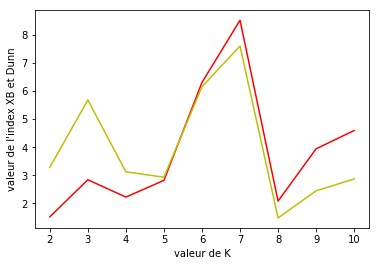

In [58]:
index_Dunn = []
index_XB = []
for k in range(2, 11):
    dunn, xb = optimisation(k, DataFnorm_Paris)
    index_Dunn.append(dunn)
    index_XB.append(xb)
plt.plot([i for i in range(2, 11)], index_Dunn, color='r')
plt.plot([i for i in range(2, 11)], index_XB, color='y')
plt.xlabel("valeur de K")
plt.ylabel("valeur de l'index XB et Dunn")
plt.show()